# Principal Component Analysis


## Principal Component Analysis

The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables, while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.

principal components analysis (PCA) is a technique
that can be used to simplify a dataset

It is a linear transformation that chooses a new
coordinate system for the data set such that

greatest variance by any projection of the data set comes to lie on the first axis (then called the first principal component),

the second greatest variance on the second axis, and so on.

PCA can be used for reducing dimensionality by eliminating the later principal components.

PCA can be used for reducing dimensionality by eliminating the later principal components.

## PCA Toy Example 

Consider the following 3D points
<img src="toy_1.png"  style="width: 700px;"/>

If each component is stored in a byte, we need 18 = 3 x 6 bytes

Looking closer, we can see that all the points are related geometrically: they are all the same point, scaled by a factor:
<img src="toy2.png"  style="width: 700px;"/>

They can be stored using only 9 bytes (50% savings!): Store one point (3 bytes) + the multiplying constants (6 bytes)

## Geometrical Interpretation:

View each point in 3D space.

<img src="toy3.png"  style="width: 700px;"/>



In this coordinate system, every point has only one non-zero coordinate: we only need to store the direction of the line (a 3 bytes image) and the non- zero coordinate for each of the points (6 bytes).

## Principal Component Analysis (PCA)

Given a set of points, how do we know if they can be compressed like in the previous example?

 The answer is to look into the correlation between the points

The tool for doing this is called PCA

## PCA

By finding the **eigenvalues and eigenvectors** of the covariance matrix, we find that the eigenvectors with the largest eigenvalues correspond to the dimensions that have the strongest correlation in the dataset.

This is the principal component.

PCA is a useful statistical technique that has found application in:

- fields such as face recognition and image compression
- finding patterns in data of high dimension.

## PCA Theorem

Let $x_1, x_2, \ldots, x_n$ be a set of $n$ vectors, $x_i \in \mathbb R^N$, and let $\bar x$ be their average

$$
x_i = \begin{bmatrix} x_{i,1} \\ x_{i,2}, \\ \ldots \\ x_{i,N} \end{bmatrix} \ \ and \ \ 
\bar x = \frac{1}{n} \sum_{i=1}^n \begin{bmatrix} x_{i,1} \\ x_{i,2}, \\ \ldots \\ x_{i,N} \end{bmatrix}
$$

 Let $X$ be the $N \times n$ matrix with columns $x_1-\bar x, \ldots, x_n - \bar x$:
$$
X = \begin{bmatrix}x_1- \bar x & x_2 - \bar x & \ldots & x_n - \bar x \end{bmatrix}
$$

**Note**: subtracting the mean is equivalent to translating the coordinate system to the location of the mean.

Let $Q = X X^\top$ be the $N \times N$ matrix:





**Notes**:
1. $Q$ is square
2. $Q$ is symmetric
3. $Q$ is the covariance matrix [aka scatter matrix]
4. $Q$ can be very large (in vision, $N$ is often the number of pixels in an image!)

** Theorem:**

Each $x_j$ can be written as $x_j = \bar x +\sum_{i=1}^n g_{ji} e_i$, where $e_i$ are the $n$ eigenvectors of $Q$ with non-zero eigenvalues.

** Notes:** 
1. The eigenvectors $e_1, \ldots, e_n$ span an **eigenspace**
2. $e_1, \ldots, e_n$ are orthonormal vectors
3. The scalars $g_{ji}$ are the coordinates of $x_j$ in the space
$$
g_{ji} = (x_j - \bar x)e_i
$$

## Using PCA to Compress Data

- Expressing $x$ in terms of $e_1, \ldots, e_n$ has not changed the size of the data
- However, if the points are highly correlated many of the coordinates of $x$ will be zero or closed to zero.


** Note: **
this means they lie in a lower-dimensional linear subspace

- Sort the eigenvectors $e_i$ according to their eigenvalue:
$$
\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n
$$
- Assuming that $\lambda_i \approx 0$ if $i>k$
- Then 
$$
x_j \approx \bar x + \sum_{i=1}^k g_{ji} e_i$
$$

## PCA Example –STEP 1

<img src="pca1.png"  style="width: 700px;"/>

## PCA Example –STEP 2

- Calculate the covariance matrix
$$
cov = \begin{bmatrix}616555556 & .615444444 \\ .615444444 & .716555556 \end{bmatrix}
$$ 
- since the non-diagonal elements in this covariance matrix are positive, we should expect that both the $x$ and $y$ variable increase together.

## PCA Example –STEP 3


Calculate the eigenvectors and eigenvalues of the covariance matrix
$$
eigenvalues = \begin{bmatrix} .0490833989 \\1.28402771 \end{bmatrix}
$$
$$
eigenvectors = \begin{bmatrix} -.735178656 &-.677873399\\ .677873399& -735178656 \end{bmatrix} 
$$

## PCA Example –STEP 3

<img src="pca2.png"  style="width: 700px;"/>

- eigenvectors are plotted as diagonal dotted lines on the plot.
- Note they are perpendicular to each other.
- Note one of the eigenvectors goes through the middle of the points, like drawing a line of best fit.
- The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

## PCA Example –STEP 4

Feature Vector = $(eig_1, eig_2, eig_3, \ldots, eig_n)$
We can either form a feature vector with both of the eigenvectors:
$$
\begin{bmatrix} -.735178656 &-.677873399\\ .677873399& -735178656 \end{bmatrix} 
$$
or, we can choose to leave out the smaller, less significant component and only have a single column:
$$
 \begin{bmatrix} -.735178656 \\ .677873399\end{bmatrix} 
$$


## PCA Example –STEP 5

** Deriving new data coordinates ** 
$$FinalData = RowFeatureVector \times RowZeroMeanData$$
**RowFeatureVector** is the matrix with the eigenvectors in the columns transposed so that the eigenvectors are now in the rows, with the most significant eigenvector at the top

**RowZeroMeanData** is the mean-adjusted data transposed, ie. the data items are in each column, with each row holding a separate dimension.

**Note:** his is essential Rotating the coordinate axes so higher-variance axes come first.

## PCA Example –STEP 5

<img src="pca3.png"  style="width: 700px;"/>

## PCA Example : Final Approximation

<img src="pca4.png"  style="width: 700px;"/>

## Another way of thinking about Principal component

- direction of maximum variance in the input space
-  happens to be same as the principal eigenvector of the covariance matrix

## One-dimensional projection

<img src="pca5.png"  style="width: 700px;"/>

## Covariance to variance


- From the covariance, the variance of any projection can be calculated.
- Let $w$ be a unit vector
$$
\langle(w^\top x)^2\rangle - \langle w^\top x\rangle^2 = w^\top C w \\ = \sum_{ij} w_i C_{ij} w_j
$$

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Maximizing variance

- Principal eigenvector of C
    - the one with the largest eigenvalue

$$
w^* = \arg\max_{w:|w|= 1} w^\top C w
$$
$$
\lambda_{max}(C) = \max_{w:|w| = 1} w^\top C w \\
= w^{*\top} C w^*
$$

## Singular Value Decomposition (SVD)
Any $m \times n$ matrix $X$ can be written as the product of 3 matrices:
$$
X = USV^*
$$
Where:
- $U$ is $n \times n$ unitary matrix
- $V$ is $m \times m$ unitary matrix
- $S$ is $n \times m$ diagonal and its diagonal elements are called the singular values of $X$, and are such that:
$$
\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_r > \sigma_{r+1} = \ldots = \sigma_n =0
$$
$$
S = \begin{bmatrix} diag({\sigma}) & 0 \end{bmatrix}
$$

## SVD Properties

- The columns of $U$ are the eigenvectors of $XX^\top$
￼- The columns of $V$ are the eigenvectors of $XX^\top$
- The squares of the diagonal elements of $S$ are the
$XX^\top$ eigenvalues 

# Independent component analysis (ICA)

PCA (Principal Component Analysis) seems to cover a wide range of data analysis; in addition, for transient data we have Hilbert-Huang Transform.


So why do we need ICA?

-  PCA is based on the second-order statistics. That is, data fit Gaussian distribution (i.e., exploit correlation/ covariance properties)
- What if data cannot be characterized by the second moment? That is, $R_x = E{xx^{\top}} = I$ (white noise)?

## When do we generally need ICA?

- when data cannot be ensembled (hence, most likely
non-Gaussian via Central Limit Theorem); 
- when raw data appear to be very noisy;
- when a sensor records several source signals simultaneously.
- mathematically, PCA is adequate if the data are Gaussian, linear, and stationary. If not, then higher- order statistics begin to be essential.

## Comparison of PCA with ICA


PCA minimizes the covariance of the data; on the other hand ICA minimizes higher-order statistics such as fourth-order cummulant (or kurtosis), thus minimizing the mutual information of the output.

Specifically, PCA yields orthogonal vectors of high
energy contents in terms of the variance of the signals, whereas ICA identifies independent components for non-Gaussian signals.


ICA thus possesses two ambiguities:

First, the ICA model equation is underdetermined system; one cannot determine the variances of the independent components.


Second, one cannot rank the order of dominant components.

## Why ICA has been a late bloomer

Historically there is a good reason why ICA came to be studied only recently, whereas random variables are assumed to be Gaussian in most of statistical theory;

ICA thrives on the fact that the data are non-Gaussian.


This implies that ICA exploits the loose end of the Central Limit Theorem which states that the distribution of a sum of independent random variables tends toward a Gaussian distribution. Fortunately for ICA, there are many cases where some real-world data do not have sufficient data pools that can be characterized as Gaussian.

## What is ICA?

“Independent component analysis (ICA) is a method for finding underlying factors or components from multivariate (multi-dimensional) statistical data. What distinguishes ICA from other methods is that it looks for components that are both statistically independent, and nonGaussian.”

A.Hyvarinen, A.Karhunen, E.Oja
‘Independent Component Analysis’


## ICA

Blind Signal Separation (BSS) or Independent Component Analysis (ICA) is the identification & separation of mixtures of sources with little prior information.
- Applications include:
    - Audio Processing
    - Medical data
    - Finance
    - Array processing (beamforming)
    - Coding
- … and most applications where Factor Analysis and PCA is currently used.
- While PCA seeks directions that represents data best in a Σ|x0 - x|2 sense, ICA seeks such directions that are most independent from each other.
Often used on Time Series separation of Multiple Targets	


## ICA estimation principles 

- Principle 1: “Nonlinear decorrelation. Find the matrix $W$ so that for any $i \neq j$ , the components $y_i$ and $y_j$ are uncorrelated, and the transformed  components $g(y_i)$ and $h(y_j)$ are uncorrelated, where $g$ and $h$ are some suitable nonlinear functions.”
- Principle 2: “Maximum nongaussianity”. Find the local maxima of nongaussianity of a linear combination $y=Wx$ under the constraint that the variance of $x$ is constant. 
- Each local maximum gives one independent component.


<img src="ica_1.png"  style="width: 700px;"/>

<img src="ica_2.png"  style="width: 700px;"/>

<img src="ica_3.png"  style="width: 700px;"/>

<img src="ica_4.png"  style="width: 700px;"/>

<img src="ica_5.png"  style="width: 700px;"/>

<img src="ica_6.png"  style="width: 700px;"/>

<img src="ica_7.png"  style="width: 700px;"/>

## Ambiguities

- Can‘t determine the variances (energies) of the IC‘s
    - Both s & A are unknowns, any scalar multiple in one of the sources can always be cancelled by dividing the corresponding col of $A$ by it.
    - Fix magnitudes of IC‘s assuming unit variance: $E{s_i^2} = 1$
    - Only ambiguity of sign remains


- Can‘t determine the order of the IC‘s
    - Terms can be freely changed, because both $s$ and $A$ are unknown. So we can call any IC as the first one.


## ICA in a nutshell

- Given measurement, $x$, find the independent components, $s$, and the associated mixing matrix, $A$, such that $$x=As$$
- Find $w_j$ that maximizes non-Gaussianity of $w_j^\top x$
- Independent components $s$ is then found from $s = W x$ where $A^{-1} = W = [w_1, w_2, \ldots, w_m]$

## Fast ICA in words

<img src="ica1.png"  style="width: 700px;"/>

## A Fast ICA Algorithm (using Negentropy concept)

1. Center the data, $x$, to make its mean zero (same as PCA): $$ x := x-Ex$$ 
2. Whiten $x$ to maximize non-Gaussian characteristics(PCA with filtering): $$ z = V \Lambda^{-1/2}V^\top x, \ \ V \Lambda V^\top = E(xx^\top)$$
3. Choose an initial random vector, $w$, $||w|| =1$
4. Update w (maximally non-Gaussian direction!) $$ w = E{z * g(w^\top z)} - E{g’ (w^\top z)}w, \ \ \\ g(y) = tanh(a_1y) \ or \ y*exp(-y^2/2), \  1<a_1 <2 \\ w = w/||w||$$
5. If not converged, then go back to step 4.
6. Obtain the independent component, $s$:
7. $s=[w_1, w_2, \ldots, w_n]x$

## Numerical examples

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


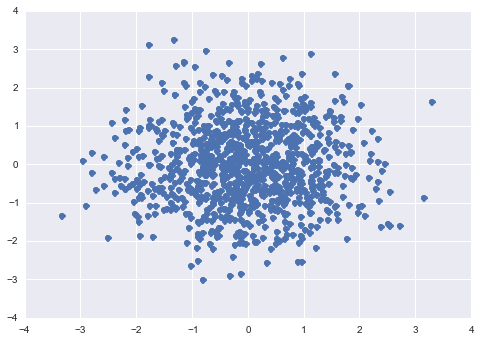

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

P = 1000
points = np.random.randn(P,2)
A = [[2, 1], [0, 1]] 
A = np.array(A)
plt.plot(points[:, 0], points[:, 1], ls='', marker='o')

## Mixing sounds (Coctail party problem)

The example from here http://www.shogun-toolbox.org/static/notebook/current/bss_audio.html

In [38]:
#Tech stuff
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np
%matplotlib inline
import sys
def load_wav(filename,samplerate=44100):
    
    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, len(data) * ratio)
    
    return samplerate, data.astype(np.int16)

In [39]:
#Reading the wavefile
import StringIO
import base64
import struct  

from IPython.core.display import HTML
from IPython.core.display import display
def wavPlayer(data, rate):
    """ will display html 5 player for compatible browser
    The browser need to know how to play wav through html5.
    there is no autoplay to prevent file playing when the browser opens
    Adapted from SciPy.io. and
    github.com/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb
    """
    
    buffer = StringIO.StringIO()
    buffer.write(b'RIFF')
    buffer.write(b'\x00\x00\x00\x00')
    buffer.write(b'WAVE')

    buffer.write(b'fmt ')
    if data.ndim == 1:
        noc = 1
    else:
        noc = data.shape[1]
    bits = data.dtype.itemsize * 8
    sbytes = rate*(bits // 8)*noc
    ba = noc * (bits // 8)
    buffer.write(struct.pack('<ihHIIHH', 16, 1, noc, rate, sbytes, ba, bits))

    # data chunk
    buffer.write(b'data')
    buffer.write(struct.pack('<i', data.nbytes))

    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and sys.byteorder == 'big'):
        data = data.byteswap()

    buffer.write(data.tostring())
    # return buffer.getvalue()
    # Determine file size and place it in correct
    # position at start of the file.
    size = buffer.tell()
    buffer.seek(4)
    buffer.write(struct.pack('<i', size-8))
    
    val = buffer.getvalue()
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/wav;base64,{base64}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64=base64.encodestring(val))
    display(HTML(src))

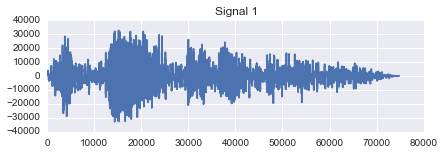

In [40]:
#The first sound
import pylab as pl
import numpy as np
# load
fs1,s1 = load_wav('tbawht02.wav') # Terran Battlecruiser - "Good day, commander."

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s1)
pl.title('Signal 1')
pl.show()

# player
wavPlayer(s1, fs1)

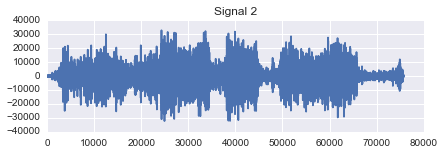

In [41]:
# load
fs2,s2 = load_wav('TMaRdy00.wav') # Terran Marine - "You want a piece of me, boy?"

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s2)
pl.title('Signal 2')
pl.show()

# player
wavPlayer(s2, fs2)

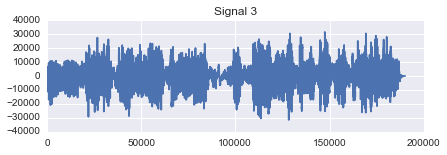

In [42]:
# load
fs3,s3 = load_wav('PDrPss02.wav') # Protoss Zealot - "Drop your weapon. You have 15 seconds to comply" 


# plot
pl.figure(figsize=(6.75,2))
pl.plot(s3)
pl.title('Signal 3')
pl.show()

# player
wavPlayer(s3, fs3)

Mixing Matrix:
[[ 1.   0.5  0.5]
 [ 0.5  1.   0.5]
 [ 0.5  0.5  1. ]]


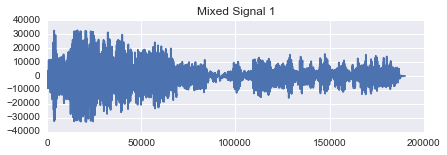

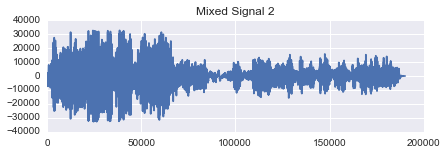

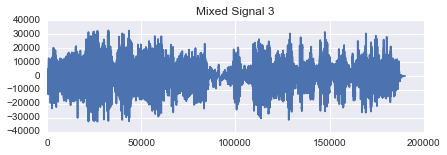

In [43]:
# Adjust for different clip lengths
fs = fs1
length = max([len(s1), len(s2), len(s3)])
s1.resize((length,1))
s2.resize((length,1))
s3.resize((length,1))

S = (np.c_[s1, s2, s3]).T

# Mixing Matrix
#A = np.random.uniform(size=(3,3))
#A = A / A.sum(axis=0)
A = np.array([[1, 0.5, 0.5],
              [0.5, 1, 0.5], 
              [0.5, 0.5, 1]]) 
print 'Mixing Matrix:'
print A.round(2)

# Mix Signals
X = np.dot(A,S)

# Mixed Signal i
for i in range(X.shape[0]):
    pl.figure(figsize=(6.75,2))
    pl.plot((X[i]).astype(np.int16))
    pl.title('Mixed Signal %d' % (i+1))
    pl.show()
    wavPlayer((X[i]).astype(np.int16), fs)

In [44]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X.T).T  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

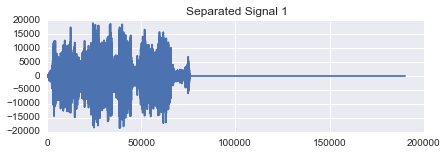

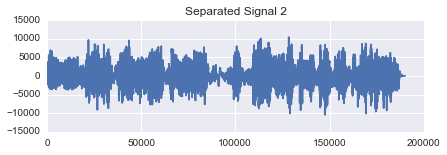

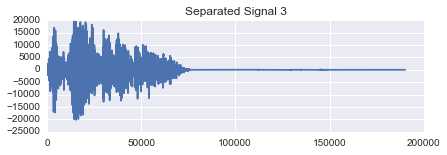

In [45]:
# Show separation results

# Separated Signal i
gain = 1000000
for i in range(S_.shape[0]):
    pl.figure(figsize=(6.75,2))
    pl.plot((gain*S_[i]).astype(np.int16))
    pl.title('Separated Signal %d' % (i+1))
    pl.show()
    wavPlayer((gain*S_[i]).astype(np.int16), fs)